<a href="https://colab.research.google.com/github/vbaryshev/Urban-planning-and-spatial-analysis/blob/master/%22OLAP_%D0%BA%D1%83%D0%B1_(%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F_%D0%BF%D0%BE%D0%B2%D0%B5%D1%80%D1%85%D0%BD%D0%BE%D1%81%D1%82%D1%8C)_%D0%B2_Google_Colab_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/01.01.Getting_Started_ODC_and_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="top"></a>
# Начало работы: Open Data Cube в Google Colab

1.   [Open Data Cube Framework](#ODC-Framework)
2.   [Google Colab and Jupyter Notebooks](#what-is)
3.   [Продукты и измерения](#products-measurements)
4.   [Как загрузить данные](#How-to-Load-Data)
5.   [Изучите больше приложений](#explore-applications)
6.   [Справочные ссылки](#reference-links)

*В статье ниже представлен обзор ODC в Google Colab.  Если вы хотите запускать записные книжки, вам необходимо настроить учетную запись Google Earth Engine.  Это бесплатно, и вы можете узнать больше о том, как это сделать [Здесь](https://www.openearthalliance.org/sandbox).*

<a name="ODC-Framework"></a>
# 1. Open Data Cube Framework (Платформа кубов открытых данных)

Куб открытых данных(ODC, [opendatacube.org](https://www.opendatacube.org/)) это программный фреймворк с целью:

> ... усиление воздействия спутниковых данных за счет предоставления открытого и свободно доступного инструмента использования, а также для содействия сообществу в разработке, поддержании и расширении широты и глубины приложений.

Экземпляр ODC состоит из данных, механизма для индексации этих данных (например, базы данных) и базы кода Python с открытым исходным кодом, использующей широкий спектр библиотек Python.  Более подробное введение и некоторую историю ODC можно найти [Здесь](https://medium.com/opendatacube/what-is-open-data-cube-805af60820d7).







![ODC framework](https://miro.medium.com/max/700/1*2XgL8GGYEvDcOpiqZaWJ7Q.png)

Платформа ODC может работать в самых разных инфраструктурах - от простого экземпляра Docker, работающего на портативном компьютере, до непрерывного покрытия. (например [Digital Earth Afica](https://www.digitalearthafrica.org/)). Этот блокнот предназначен для ознакомления с ODC, работающим на платформе Google Colab, и с использованием данных из [Каталог Google Earth Engine](https://developers.google.com/earth-engine/datasets).

Ноутбук обеспечивает:

*   Краткое введение в записные книжки Jupyter и среду Colab (со ссылками для получения дополнительной информации)
*  Рабочий пример того, как настроить ODC-соединение из Google Colab
*   Примерный перечень доступных продуктов и размеров
*   Как загрузить образцы данных
*   Ссылки на рабочие примеры, демонстрирующие несколько приложений наблюдения Земли

Этот материал предназначен для ознакомления и обучения, и мы надеемся, что он поможет начать ваше путешествие с ODC!

[Вернуться наверх](#top)


Sentinel-1 Наводнение

Этот ноутбук использует данные Sentinel-1 для обнаружения протяженности воды и наводнений. Поскольку радар может проникать в облака, можно получить согласованные временные ряды изображений региона при 6-дневных или 12-дневных повторных посещениях на основе использования одной или двух миссий Sentinel-1. Если интересующая область попадает в область перекрытия сцен, возможно, можно будет получать еще более частые посещения. Этот блокнот включает в себя несколько различных продуктов данных, включая гистограммы для определения хорошего порога обнаружения воды, продукт порогового значения VH-диапазона с одной датой для определения протяженности воды и продукт изменений с несколькими датами для определения нового наводнения.

Основные данные были обработаны Google Earth Engine с использованием сцен GRD для создания обратного рассеяния C-диапазона (диапазоны VV и VH) с пространственным разрешением 10 метров. Данные постоянно доступны с начала 2017 года по всему миру. Важно отметить, что эти данные НЕ включают радиометрическую поправку на рельеф (RTC), поэтому существуют проблемы с использованием этих данных в горных районах. Кроме того, пользователям рекомендуется сравнивать сцены только с одним и тем же направлением прохода (восходящим или нисходящим) и траекторией орбиты, чтобы избежать проблем с геометрией просмотра.

Для получения дополнительной информации о том, как интерпретировать данные радара, см. Следующий документ:
«Руководство по интерпретации данных радара с синтезированной апертурой в L-диапазонах и C-диапазонах» можно найти ЗДЕСЬ .



Инструкция по исполнению

Рекомендуется, чтобы пользователи сначала запустили записную книжку «как есть», чтобы успешно завершить авторизацию Google и просмотреть образцы результатов. Затем пользователи должны искать восемь разных меток «ИЗМЕНИТЬ ЗДЕСЬ» в верхней части блоков кода, чтобы идентифицировать код, который можно изменить. Это включает:

# 1 - Выберите пространственный регион и временной экстент
# 2 - Выберите параметры фильтрации данных
# 3 - Выберите средний размер фильтра блока
# 4 - Выберите сцену для гистограммы и RGB
# 5 - Выберите параметры для продуктов вывода с одной датой
# 6 - Выберите две даты для затопления продукта
# 7 - Выберите параметры для многодневных выходных продуктов
# 8 - Выбрать параметры вывода файла

После запуска полной записной книжки пользователи могут запускать отдельные блоки кода с помощью «Shift-Return» или запускать сегменты кода с помощью меню «Время выполнения». Пользователям не нужно проходить этапы авторизации Google для дополнительных циклов выполнения.


In [ ]:
!wget -nc https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
from odc_colab import odc_colab_init
odc_colab_init(install_odc_gee=True)

File ‘odc_colab.py’ already there; not retrieving.



In [ ]:
from odc_colab import populate_db
populate_db()

No database file supplied. Downloading default index.
Lockfile exists, skipping population.


In [ ]:
# Игнорировать предупреждения
import warnings
warnings.simplefilter('ignore')

# Загрузить конфигурацию куба данных
from odc_gee.earthengine import Datacube
dc = Datacube()

# Утилиты импорта
from utils.data_cube_utilities.dc_display_map import display_map
from utils.data_cube_utilities.dc_rgb import rgb
from utils.data_cube_utilities.raster_filter import stats_filter_2d
from utils.data_cube_utilities.import_export import export_xarray_to_geotiff
import folium
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Выберите платформу данных и продукт
# ПРИМЕЧАНИЕ: включены данные из миссий Sentinel-1A и Sentinel-1B.
platform = 'Sentinel-1A'
product = 's1_google'

**Определите пределы анализа и просмотра**

 Выберите центр области анализа (lat_long) ниже.  Размер области (в градусах), окружающей эту центральную точку, определяется с помощью параметра box_size_deg.  Пользователи могут выбрать один из примеров регионов или добавить новый регион.  Используйте вывод карты для увеличения или уменьшения масштаба, чтобы найти другие регионы.  Нажмите на карту, чтобы найти координаты широты и долготы.  После выбора области анализа вы также можете выбрать временное окно, указав дату начала и дату окончания для параметра «time_extents».  Согласованные данные временных рядов Sentinel-1 доступны с января 2017 года.  Чтобы избежать проблем с превышением пределов памяти, пользователи должны начинать с небольших областей (<0,20 градуса) и небольших временных окон (несколько месяцев), прежде чем переходить к более крупным исследованиям.


In [ ]:
# ИЗМЕНИТЬ ЗДЕСЬ

# Удалите теги комментариев (#), чтобы выбрать пример из приведенных ниже блоков кода.
# Примеры №1 и №2 включают фильтры данных для обеспечения согласованных углов обзора (числа орбит).
# Пример № 3 для пользователей, чтобы определить их собственное общее тематическое исследование.

In [ ]:
# Пример №1 - Россия, Рязанская Область, г. Спасск-Рязанский
# Паводок начались 1 марта 2020 г. (Разлив реки Ока)
# Паводок закончились 29 августа 2020 г. (Разлив реки Ока)
# Временной интервал = 01.03.2020 по 01.09.2020 (6 месяцев)

# lat_long = (54.4197, 40.4723)
# box_size_deg = 0.02
# time_extents = ('01.03.2020', '01.09.2021')

In [ ]:
# Пример №1 - Россия, Рязанская Область, г. Спасск-Рязанский
# Паводок начались 1 марта 2020 г. (Разлив реки Ока)
# Паводок закончились 29 августа 2020 г. (Разлив реки Ока)
# Временной интервал = 01.03.2020 по 01.09.2020 (6 месяцев)

lat_long = (54.4197, 40.4723)
box_size_deg = 0.25
time_extents = ('2021-04-01', '2021-05-10')
#lat_long = (17.713, -92.595)
#box_size_deg = 0.20
#time_extents = ('2020-09-01', '2020-12-31')

In [ ]:
# Пример № 3 - Общий пример использования

# Определите пространственную протяженность по широте и долготе
# lat_lon >  центр окна
# box_size_deg > ширина и высота окна в градусах

# lat_long = (LAT, LON)
# box_size_deg = РАЗМЕР В ГРАДУСАХ

# Define time extent (YYYY-MM-DD)

# time_extents = ('START', 'END')

In [ ]:
# Рассчитайте широту и долготу окна анализа.
latitude = (lat_long[0]-box_size_deg/2, lat_long[0]+box_size_deg/2)
longitude = (lat_long[1]-box_size_deg/2, lat_long[1]+box_size_deg/2)

In [ ]:
#2 ИЗМЕНИТЬ ЗДЕСЬ

# Определите список параметров для фильтрации данных
# Удалите теги комментариев (#) ниже, чтобы выбрать ОДНУ из строк параметров.

# Пример №1 - Кампур, Гватемала
# Data Filter > Orbit=26

# parameters = dict(product=product, platform=platform, measurements=['vv','vh'],time=time_extents, lat=latitude, lon=longitude, group_by='time',query={'filter':'relativeOrbitNumber_start=26'})

# Пример № 2 - Макуспана, Табаско, Мексика
# Data Filter > Orbit=99

#parameters = dict(product=product, platform=platform, measurements=['vv','vh'],time=time_extents, lat=latitude, lon=longitude, group_by='time',query={'filter':'relativeOrbitNumber_start=99'})

# Пример № 3 - Общий пример использования

# ВСЕ ДАННЫЕ
# Этот список параметров загрузит все данные (оба направления, обе миссии, все орбиты)
# Используйте выходные данные для просмотра доступных данных перед добавлением дополнительных фильтров (ниже)

parameters=dict(product=product, platform=platform, measurements=['vv','vh'],time=time_extents, lat=latitude,lon=longitude, group_by='time')

# ФИЛЬТРОВАННЫЕ ДАННЫЕ
# group_by = time (all images separated) or solar_day (grouped daily)
# orbitProperties_pass = ASCENDING or DESCENDING
# platform_number = A or B
# relativeOrbitNumber_start = (any specific orbit number)
# parameters = dict(product=product, platform=platform, measurements=['vv','vh'],time=time_extents, lat=latitude, lon=longitude, group_by='time',query={'filter':'orbitProperties_pass="ASCENDING" AND platform_number="A" AND relativeOrbitNumber_start=136'})

In [ ]:
f = folium.Figure(width=1000, height=800)
m = display_map(latitude,longitude)
f.add_child(m)

**Загрузите данные и примените фильтрацию**

In [ ]:
sar_dataset = dc.load(**parameters)

In [ ]:
#@Фильтр Метаданные
# Фильтр Метаданные

from operator import itemgetter

def get_metadata(group):
    metadata = (set(), set(), set(), set())
    for ds in group:
        metadata[0].add(np.datetime64(ds.metadata_doc.get('properties').get('dtr:start_datetime'), 'D'))
        metadata[1].add(ds.metadata_doc.get('properties').get('gee:properties').get('orbitProperties_pass'))
        metadata[2].add(ds.metadata_doc.get('properties').get('gee:properties').get('platform_number'))
        metadata[3].add(ds.metadata_doc.get('properties').get('gee:properties').get('relativeOrbitNumber_start'))
    return tuple(map(lambda x: ', '.join([str(i) for i in x]), metadata))

parameters.update(group_by='time' if not parameters.get('group_by') else parameters['group_by'])
sar_metadata = sorted([get_metadata(groups)
                       for groups in dc.group_datasets(dc.find_datasets(**parameters),
                                                       parameters.get('group_by')).values],
                      key=itemgetter(0))

**Сводка данных**

 В таблице ниже приведены доступные данные Sentinel-1.  Вы найдете разные даты приобретения, направления прохода (восходящий или нисходящий), миссии (A = Sentinel-1A, B = Sentinel-1B) и номера путей орбиты.  Обнаружение наводнения требует сравнения изображений с одинаковыми углами обзора.  Таким образом, важно сравнивать измерения только с одним и тем же номером орбитального пути.  Вы обнаружите, что один и тот же номер орбиты может быть получен из двух миссий (6-дневное разделение) или одной миссии (12-дневное разделение), но направление прохода (восходящее или нисходящее) будет одинаковым.

In [ ]:
# Показать индексы и даты приобретения
pd.set_option('display.max_rows', 100)
pd.DataFrame(sar_metadata, columns=['Acquisition Date', 'Pass Direction', 'Mission', 'Orbit Number'])

,Acquisition Date,Pass Direction,Mission,Orbit Number
0,2021-04-02,DESCENDING,A,94
1,2021-04-06,ASCENDING,B,72
2,2021-04-09,DESCENDING,A,21
3,2021-04-14,DESCENDING,A,94
4,2021-04-18,ASCENDING,B,72
5,2021-04-21,DESCENDING,A,21
6,2021-04-26,DESCENDING,A,94
7,2021-04-30,ASCENDING,B,72
8,2021-05-03,DESCENDING,A,21
9,2021-05-08,DESCENDING,A,94


**Спекл-фильтрация с использованием блочного среднего фильтра**

 Радиолокационные данные часто имеют зернистый вид из-за пятен (статистический шум), а различия между водой и сушей не совпадают.  Для улучшения данных довольно часто используется фильтрация спеклов.  Ниже приведен алгоритм, который использует обычный фильтр «усреднения блоков» для усреднения пикселей, окружающих любой заданный пиксель.  Пользователи могут выбрать размер окна фильтра нечетных чисел (например, 3,5,7 и т. Д.) Для фильтрации как данных VV, так и VH.  Размер окна фильтра 3 будет усреднять область 3x3 вокруг каждого пикселя.  Точно так же размер окна фильтра 5 будет усреднять область 5x5 вокруг каждого пикселя.

In [ ]:
# Настройте дБ для функций преобразования мощности, чтобы спекл-фильтр среднего блока работал со значениями мощности.

def to_pwr(x):
    return 10**(x/10)
def to_db(x):
    return 10*np.log10(x)

In [ ]:
#3 ИЗМЕНИТЬ ЗДЕСЬ

# Пользователи могут выбрать средний размер фильтра блока, чтобы определить уровень фильтрации спеклов.  Базовый уровень - 5.
# Размер фильтра должен быть нечетным числом, например 3,5,7 и т. Д. 

block_size = 5

# Установите любые нулевые значения на 0 перед применением фильтра, чтобы предотвратить проблемы.
sar_dataset_filled = sar_dataset.where(~sar_dataset.isnull(), 0)

# Создайте новую запись в наборе данных, соответствующую отфильтрованным данным VV и VH.
sar_dataset["block_avg_filter_vv"] = sar_dataset_filled.vv.pipe(to_pwr).groupby("time")\
                                 .apply(stats_filter_2d, statistic='mean', filter_size=block_size)\
                                 .pipe(to_db)
sar_dataset["block_avg_filter_vh"] = sar_dataset_filled.vh.pipe(to_pwr).groupby("time")\
                                 .apply(stats_filter_2d, statistic='mean', filter_size=block_size)\
                                 .pipe(to_db)

**Просмотр графиков гистограммы**

 Графики гистограммы удобны для просмотра статистического распределения обратного рассеяния данных VV и VH.  В большинстве случаев легко определить разницу между пикселями суши (более высокие значения) и пикселями воды (более низкие значения).  Однако на V-поляризованное обратное рассеяние иногда могут влиять ветер и дождь (что может вызвать увеличение обратного рассеяния), поэтому для обнаружения воды рекомендуется использовать канал VH-поляризации.  Гистограмма VH в приведенном ниже примере обычно показывает сушу с пиком около -15 дБ и воду (темную) с пиком около -27 дБ.  Разумный порог обнаружения воды можно оценить по этой гистограмме.  Например, базовый код выбирает порог VH -21 дБ для разделения воды и суши, что дает разумные результаты в большинстве регионов.  Пользователи должны проверить этот порог, чтобы определить наилучшее значение для конкретного региона или водоема.


In [ ]:
#4 ИЗМЕНИТЬ ЗДЕСЬ

# Выберите один временной отрезок по его индексу (указанному выше)
acq_ind_to_show = 0

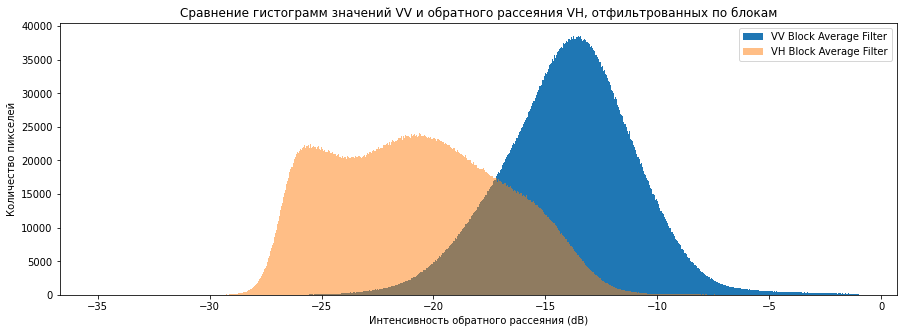

In [ ]:
fig = plt.figure(figsize=(15, 5))
sar_dataset.isel(time=acq_ind_to_show).block_avg_filter_vv.plot.hist(bins=1000,range=(-35,-1),label="VV Block Average Filter")
sar_dataset.isel(time=acq_ind_to_show).block_avg_filter_vh.plot.hist(bins=1000,range=(-35,-1),label="VH Block Average Filter", alpha=0.5)
plt.legend()
plt.xlabel("Интенсивность обратного рассеяния (dB)")
plt.ylabel("Количество пикселей")
plt.title("Сравнение гистограмм значений VV и обратного рассеяния VH, отфильтрованных по блокам")
plt.show()


**Масштабируйте амплитуду обратного рассеяния для получения лучшего изображения**

Амплитуду обратного рассеяния для каждой полосы можно масштабировать до 8-битного диапазона от 0 до 255, чтобы улучшить визуальный результат и максимизировать контраст в изображениях.  Этот процесс объясняется здесь.  Сигма-нулевое обратное рассеяние (в единицах дБ) преобразуется в единицы линейной амплитуды (цифрового числа) с использованием преобразования: DN (амплитуда) = 10 ^ (дБ / 20).  Затем гистограммы используются для просмотра диапазона значений дБ для диапазонов VV и VH.  Затем диапазон ожидаемых значений (для разных типов земель) масштабируется до 8-битного диапазона с использованием формулы: Масштаб = 256 / (диапазон).  Наконец, применяется значение «смещения», позволяющее распределить полный диапазон значений по 8-битному диапазону.  Окончательное уравнение преобразования: DN (амплитуда, 8 бит) = (DN (амплитуда) - смещение) * масштаб.


In [ ]:
# Масштабирование обратного рассеяния оптимизировано для данных с блочной фильтрацией.
# VV группа диапазона 0dB to -16dB который DN=1.00 to DN=0.158
# VH группа диапазона -5dB to -27dB which is DN=0.562 to DN=0.045
# VV/VH диапазон 0.0 to 1.0. Эти данные масштабируются на 20 для улучшения цветового контраста.

vv_convert = (10**(sar_dataset.block_avg_filter_vv/20)-0.158)*303
vh_convert = (10**(sar_dataset.block_avg_filter_vh/20)-0.045)*493
sar_dataset['vv_amp'] = vv_convert
sar_dataset['vh_amp'] = vh_convert
sar_dataset['vvvh_amp'] = (vv_convert / vh_convert) * 20

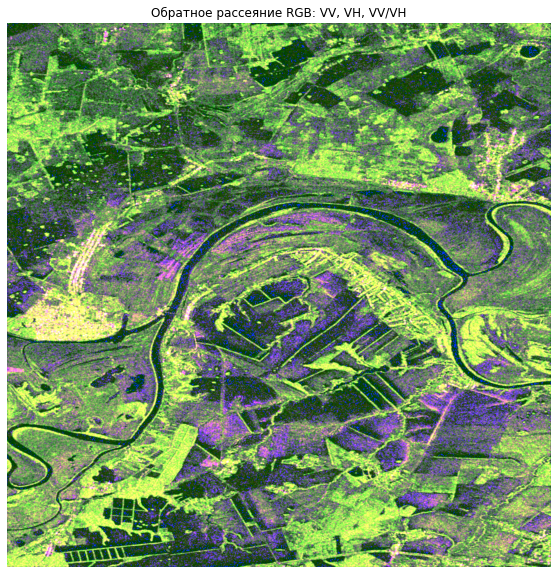

In [ ]:
# RGB График интенсивности обратного рассеяния (RGB= VV, VH, VV/VH)
# Высокое обратное рассеяние (обе полосы) из-за растительности и листвы будет отображаться ЖЕЛТЫМ (смесь красного и зеленого)
# Городские районы имеют ЯРКО-ЖЕЛТЫЙ или ПУРПУРНЫЙ цвет (из-за высокого общего рассеяния как на VV, так и на VH,
# или, в случае пурпурного цвета, более высокий VV по сравнению с VH)
# Участки с редкой растительностью и обнаженной почвой окрашены в СИНИЙ цвет (из-за низкого общего рассеяния и более высокого VV по сравнению с VH)
# Вода (без эффектов ветра или дождя) ЧЕРНАЯ (очень низкое обратное рассеяние в обоих диапазонах с одинаковыми значениями VV и VH)

rgb(sar_dataset.isel(time=acq_ind_to_show),bands=['vv_amp','vh_amp','vvvh_amp'], width=10)
plt.title('Обратное рассеяние RGB: VV, VH, VV/VH')
plt.axis('off')
plt.show()

**Однодиапазонный пороговый объем воды с одной датой**

 Приведенный ниже код позволяет пользователям выбрать одну дату (используйте приведенную выше таблицу индексов), один диапазон (например, VV или VH) и пороговое значение обнаружения воды для выбранного диапазона.  Просмотрите графики гистограммы выше, чтобы убедиться, что выбранная полоса и порог являются разумными.  Обычно для обнаружения воды используют диапазон VH.  В конечном продукте вода отображается СИНИМ цветом на фоне серого фонового изображения в полосе VH.


In [ ]:
#5 ИЗМЕНИТЬ ЗДЕСЬ

# Выберите одну дату, диапазон и порог для обнаружения воды

single_date = 0
single_variable = 'block_avg_filter_vh'
water_threshold = -25.0

In [ ]:
color_blue = np.array([0,0,255]) # Water (BLUE)
scene = sar_dataset.isel(time=single_date)
water = scene[single_variable].values < water_threshold

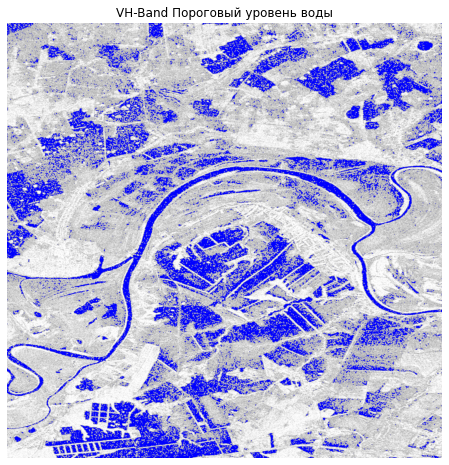

In [ ]:
rgb(scene, bands=['vh', 'vh', 'vh'], paint_on_mask=[(water, color_blue)], width=8, min_inten=0.6)
plt.title('VH-Band Пороговый уровень воды')
plt.axis('off')
plt.show()

Однополосное пороговое затопление с несколькими датами
**Текст, выделенный полужирным шрифтом**
 В приведенном ниже коде выбираются две даты, переменная (VV или VH) и порог изменения.  Конечный продукт выполняет сравнение двух дат и вычисляет изменение обратного рассеяния между этими датами.  Пиксели со значительным уменьшением обратного рассеяния (например, потеря 7 дБ), вероятно, переходят от земли к воде из-за наводнения.  Обнаружение наводнения требует сравнения изображений с одинаковыми углами обзора.  Таким образом, важно сравнивать измерения только с одним и тем же номером орбиты.  Вы обнаружите, что один и тот же номер орбиты может быть получен из двух миссий (6-дневное разделение) или одной миссии (12-дневное разделение), но направление прохода (восходящее или нисходящее) будет одинаковым.


In [ ]:
#6 ИЗМЕНИТЬ ЗДЕСЬ

# Выберите ДВА приобретения, чтобы рассчитать изменение продукта
# Выберите из индексов в таблице выше
# first_acq_ind = Первое получение среза
# second_acq_ind = получение второго временного отрезка

# Пример №1 
# Сравнить приобретения: 0=(05-Oct) to 11=(10-Dec)
# first_acq_ind = 0
# second_acq_ind = 11

# Пример № 2 
# Сравнить приобретения: 0=(04-Sep) to 10=(09-Nov)
first_acq_ind = 9
second_acq_ind = 0

# Пример # 3 - ОБЩИЕ
# first_acq_ind = TBD
# second_acq_ind = TBD


In [ ]:
#7 ЗМЕНИТЬ ЗДЕСЬ

# Выберите переменную для построения графика и порог изменения для определения наводнения.

threshold_variable = 'block_avg_filter_vh'

# Код рассчитает разницу между двумя изображениями (второе-первое).
# Определите пороговый диапазон для сравнения разницы двух измерений.
# СЕРЫЙ = количество пикселей НЕ в пределах порогового значения. 
# КРАСНЫЙ = количество пикселей МЕНЬШЕ, чем нижний предел диапазона пороговых значений.

change_threshold = -7

In [ ]:
# Установите цвета наложения
# Рассчитайте разницу в обратном рассеянии между двумя временами
# Найдите пиксели выше или ниже порогового диапазона (это значительные изменения)

color_loss = np.array([255,0,0]) # уменьшение обратного рассеяния (RED)
color_black = np.array([0,0,0]) # низкое изменение обратного рассеяния, вода(BLACK)
color_blue = np.array([0,0,255]) # Воды (BLUE)

first_acq = sar_dataset.isel(time=first_acq_ind)
second_acq = sar_dataset.isel(time=second_acq_ind)
change_product = second_acq[threshold_variable] - first_acq[threshold_variable]
below_threshold = change_product.values < change_threshold

In [ ]:
# Установите пороговое значение воды на основе данных в гистограммах для выбранной полосы
# Это "замаскирует" пиксели воды при первом захвате.

water = first_acq[threshold_variable].values < water_threshold

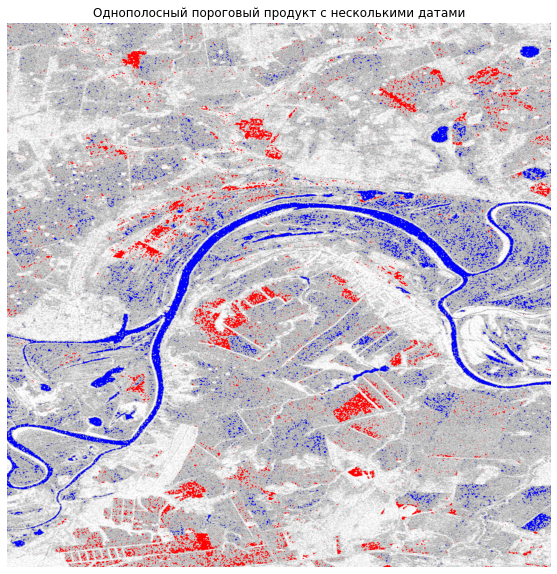

In [ ]:
# Создайте настраиваемый график пороговых значений для выявления наводнения
# Фоновое изображение обратного рассеяния VH (шкала серого)
# КРАСНЫЕ области уменьшили обратное рассеяние, что свидетельствует о новом наводнении
# СИНИЕ области - это вода при первом обнаружении.

rgb(first_acq, bands=['vh', 'vh', 'vh'], paint_on_mask=[(below_threshold, color_loss),(water, color_blue)], width=10, min_inten=0.6)
plt.title('Однополосный пороговый продукт с несколькими датами')
plt.axis('off')
plt.show()

In [ ]:
# Сгенерируйте GEOTIFF из предыдущего изображения
# 0 = нет воды, 1 = исходная вода, 2 = затоплено
# Код для сохранения этого изображения на Google Диске находится в конце блокнота.

filename = 'flooding_image'

export_xarray_to_geotiff(first_acq.vh.where(~water, 1).where(water, 0)\
                         + first_acq.vh.where(~below_threshold, 2).where(below_threshold, 0),
                         f'{filename}.tif')

In [ ]:
# Создать Folium карту
# Нанесите результаты на карту фолиума
# Щелкните меню в верхнем левом углу изображения, чтобы выбрать разные фоновые слои.

loss_layer = np.dstack([below_threshold.astype(np.int8)*c \
                        for c in color_loss]+[below_threshold.astype(np.int8)])
water_layer = np.dstack([water.astype(np.int8)*c \
                         for c in color_blue]+[water.astype(np.int8)])

f = folium.Figure(width=800, height=800)
_map = display_map(latitude, longitude)
_map.add_child(folium.TileLayer(tiles='OpenStreetMap', name='OpenStreetMap'))
_map.add_child(folium.TileLayer(tiles='https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
                                max_zoom=17,
                                attr='Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)',
                                name='OpenTopoMap'))
_map.add_child(folium.raster_layers.ImageOverlay(loss_layer, [(latitude[0], longitude[0]),
                                                              (latitude[1], longitude[1])], name='Наводнение'))
_map.add_child(folium.raster_layers.ImageOverlay(water_layer, [(latitude[0], longitude[0]),
                                                              (latitude[1], longitude[1])], name='Вода'))
_map.add_child(folium.LayerControl(position='topleft'))
f.add_child(_map)

**Постройте график водной протяженности временного ряда**

In [ ]:
water_time = ((sar_dataset[single_variable] < water_threshold))

In [ ]:
out = []
for obj in water_time:
    total = obj.values.sum()*100/1000/1000
    day = [total]
    out.append(day)

In [ ]:
water_pixels = out
scene = sar_dataset.time.dt.date.values

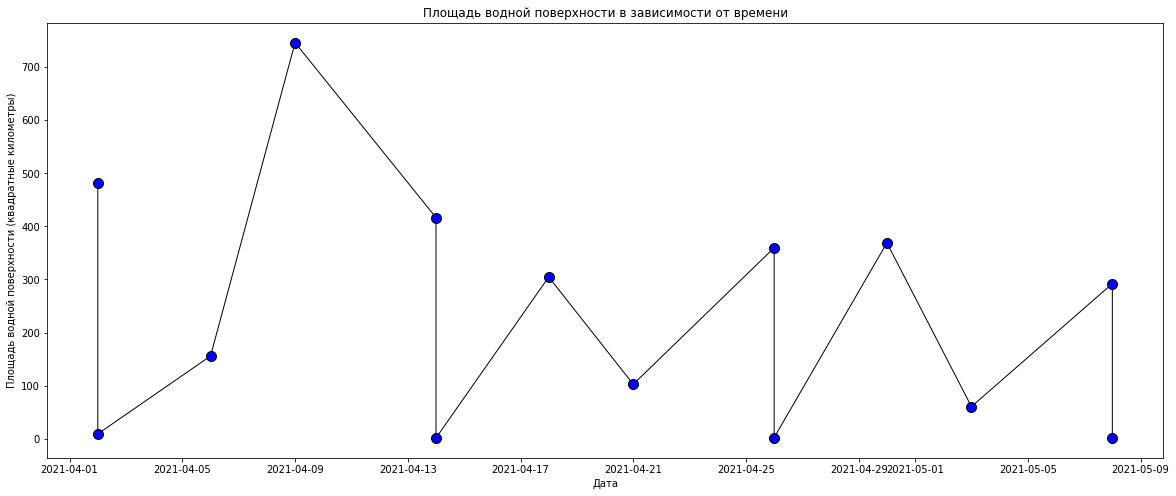

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(scene, water_pixels, c='black', marker='o', mfc='blue', markersize=10, linewidth=1)
plt.title('Площадь водной поверхности в зависимости от времени')
plt.xlabel('Дата')
plt.ylabel('Площадь водной поверхности (квадратные километры)')
plt.show()

**Сделайте GIF из водяного экстента временного ряда**

In [ ]:
import imageio
import os

In [ ]:
# Используйте дату начала / окончания для всего временного ряда
start_date = 0
end_date = scene.size-1 if scene.size >= 1 else 0

In [ ]:
# Приведенный ниже код рассчитает разницу между каждым изображением во временном ряду и первым изображением.
# Определите пороговый диапазон для сравнения разницы двух измерений.
# GREY = Пиксели НЕ ниже порога изменения (не фоновая вода или наводнение)
# RED = Пиксели НИЖЕ порога изменения (степень затопления)
# BLUE = Вода на первом изображении (базовая протяженность воды)

change_threshold = -7
color_red = np.array([255,0,0]) # Наводнение(RED)
color_blue = np.array([0,0,255]) # Исходная вода (BLUE)

In [ ]:
#Создание анимации временных рядов
#то дополнительная информация
# Создание анимации временных рядов
filenames = []
for i in range(start_date, end_date+1):
    
    first_acq = sar_dataset.isel(time=0)
    baseline_water = first_acq[single_variable].values < water_threshold
    scene = sar_dataset.isel(time=i)
    change_product = scene[single_variable] - first_acq[single_variable]
    flooding = change_product.values < change_threshold
    
    rgb(scene, bands=['vh','vh','vh'],
        paint_on_mask=[(flooding, color_red),(baseline_water, color_blue)], width=10, min_inten=0.4)
    
    date_str = np.datetime_as_string(scene.time.values.astype('datetime64[D]'), unit='D')
    plt.title('VH-Band Threshold Water Extent Time Series\n' + date_str)
    plt.axis('off')
    
    # создать имя файла и добавить его в список
    filename = f'{i}.png'
    filenames.append(filename)
    
    # сохранить рамку
    plt.savefig(filename)
    plt.close()

# Создать gif
with imageio.get_writer('flooding.gif', mode='I', fps=1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image) 

# Удалить файлы
for filename in set(filenames):
    os.remove(filename)

In [ ]:
from IPython.display import Image
Image(open('flooding.gif','rb').read())

**Сохранить выходные продукты**

 В приведенном ниже коде требуется дополнительный шаг аутентификации Google для подключения Google Диска пользователя.  После завершения авторизации второй блок кода скопирует выходные файлы на диск.

 Другой способ сохранить любой из выходных продуктов - просто «щелкнуть правой кнопкой мыши» любой выходной продукт и выбрать «Сохранить изображение как», чтобы сохранить копию на локальном компьютере пользователя.